In [93]:
#This code does traffic analysis and prediction.
#The data is taken UCI Machine Learning Repository.
#The data is preprocessed and then the model is trained.
#The model is then used to predict the traffic.



In [113]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/My Projects/Traffic Projection/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [95]:
# Check for missing values
print(df.isnull().sum())


holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [96]:
# Get basic statistics of the data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None
               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.

In [97]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Length: 48204, dtype: bool


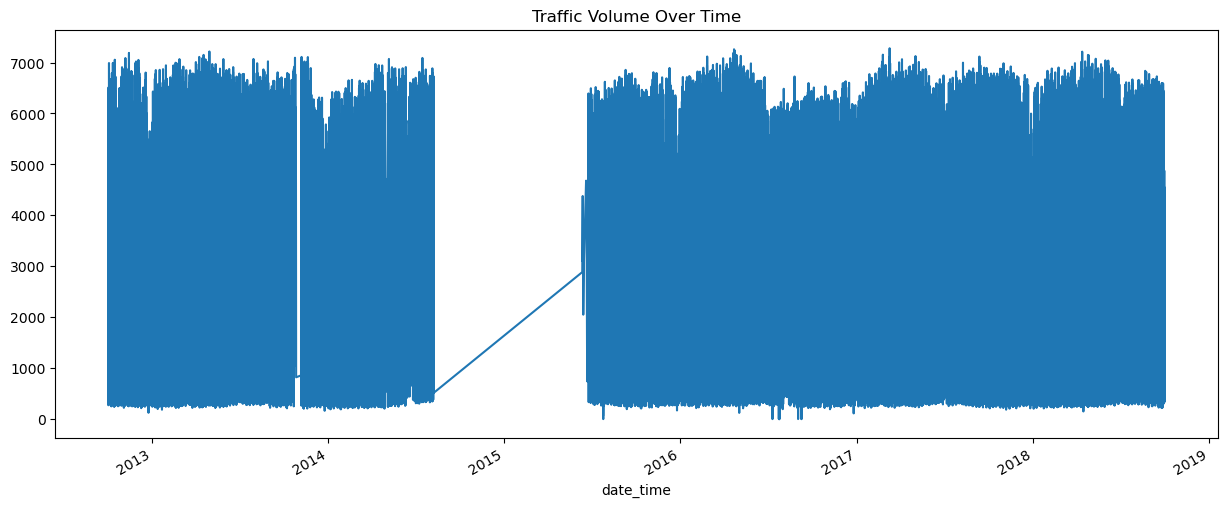

In [98]:
import matplotlib.pyplot as plt

df['date_time'] = pd.to_datetime(df['date_time'])  # replace with your date column
df.set_index('date_time', inplace=True)
df['traffic_volume'].plot(figsize=(15, 6))
plt.title('Traffic Volume Over Time')
plt.show()




From the graph, we get the understanding that there is missing values in the data between august 2014 and 2015.

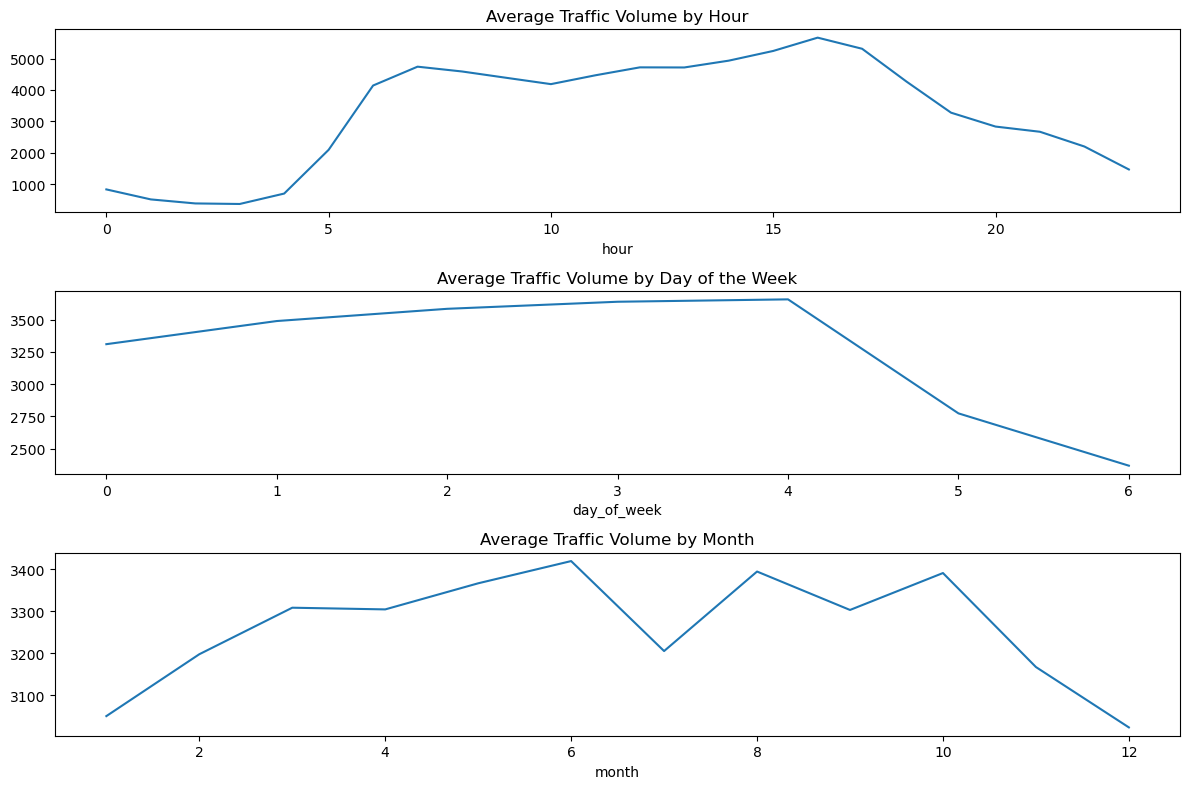

In [99]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
df.groupby('hour')['traffic_volume'].mean().plot()
plt.title('Average Traffic Volume by Hour')

plt.subplot(3, 1, 2)
df.groupby('day_of_week')['traffic_volume'].mean().plot()
plt.title('Average Traffic Volume by Day of the Week')

plt.subplot(3, 1, 3)
df.groupby('month')['traffic_volume'].mean().plot()
plt.title('Average Traffic Volume by Month')

plt.tight_layout()
plt.show()


If we look at the above 3 groups. we get following understanding.

1. average traffic increases in the morning and at evening, when people are either going to work or coming back from work.
2. It is seen that the traffic is same on average for all the days but decrease over the weekend, which makes sense because on weekend the work traffic less then usual.
3. It is also observed that during the month, the traffic is less in the summer and during the winters which is festive season.

In [100]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Inspect the holiday column
print(df['holiday'].head(10))
print(df['holiday'].isnull().sum())

# Create the new holiday field
df['is_holiday'] = df['holiday'].apply(lambda x: 0 if pd.isnull(x) or x == 'None' else 1)

# Inspect the new column to ensure it's correct
print(df[['holiday', 'is_holiday']].head(10))


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: holiday, dtype: object
48143
  holiday  is_holiday
0     NaN           0
1     NaN           0
2     NaN           0
3     NaN           0
4     NaN           0
5     NaN           0
6     NaN           0
7     NaN           0
8     NaN           0
9     NaN           0


In [101]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Find unique values in the weather_main column
unique_weather = df['weather_main'].unique()

# Print the unique values
print("Unique values in 'weather_main' column:")
print(unique_weather)

# Count of each unique value in the weather_main column
weather_counts = df['weather_main'].value_counts()

# Print the counts
print("Counts of each unique value in 'weather_main' column:")
print(weather_counts)


Unique values in 'weather_main' column:
['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']
Counts of each unique value in 'weather_main' column:
weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [102]:
from sklearn.model_selection import train_test_split

X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert the date_time column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Set the date_time column as the index
df.set_index('date_time', inplace=True)

# Handle the holiday column
df['is_holiday'] = df['holiday'].apply(lambda x: 0 if pd.isnull(x) or x == 'None' else 1)

# Drop the original holiday column
df.drop('holiday', axis=1, inplace=True)

# Print the column names to verify presence of weather columns
print(df.columns)

# Encode categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['weather_main', 'weather_description'], drop_first=True)

# Create lag features and extract date-time features
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

# Drop rows with NaN values introduced by lag features
df.dropna(inplace=True)

# Define the features (X) and the target (y)
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

r2 = r2_score(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = r2 * 100

# Print evaluation metrics and accuracy
mae, mse, rmse, r2, accuracy



Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'is_holiday'],
      dtype='object')
Mean Absolute Error: 159.71746499325798
Mean Squared Error: 68101.91522257027
Root Mean Squared Error: 260.9634365626155


(159.71746499325798,
 68101.91522257027,
 260.9634365626155,
 0.9824104314956911,
 98.24104314956911)

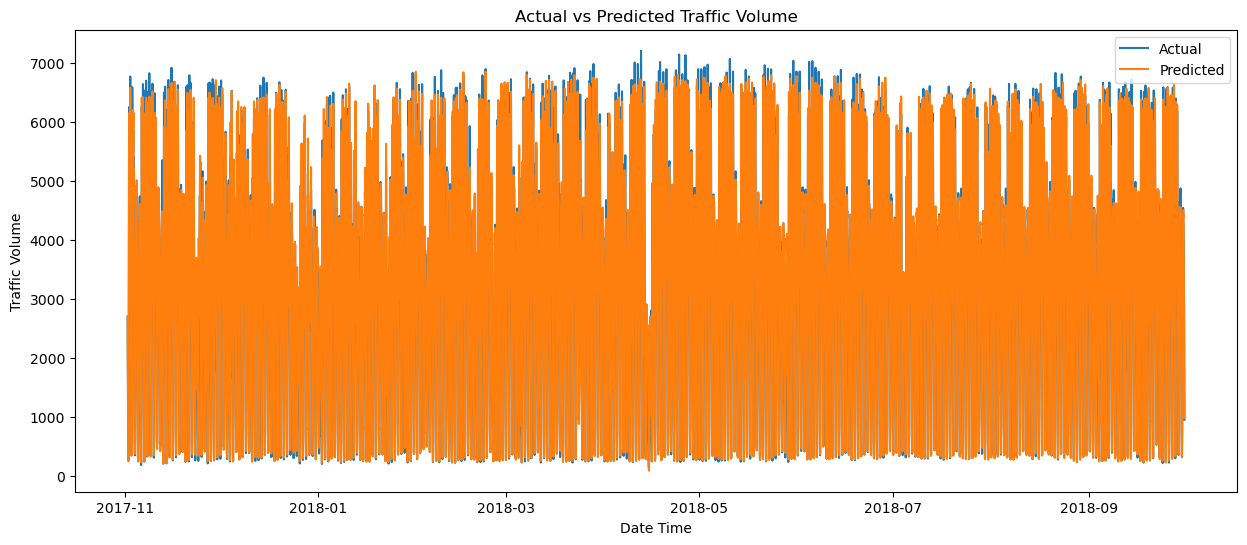

In [105]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted traffic volume
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.show()


In [108]:
# Assuming you have new data in the same format as X_test
# Example: Using the last row of X_test for demonstration
new_data = X_test.iloc[-1:].copy()

# Update new_data with appropriate future date-time values and other features
# For demonstration, we'll use the same values, but in practice, you'd update these
new_data['hour'] = 14  # Example future hour
new_data['day_of_week'] = 2  # Example future day of the week (Tuesday)
new_data['month'] = 7  # Example future month (July)
new_data['year'] = 2024  # Example future year

# Make future prediction
future_pred = model.predict(new_data)
print(f'Future Traffic Volume Prediction: {future_pred[0]}')


Future Traffic Volume Prediction: 3004.46
